In [9]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
#importing dataset
df = pd.read_excel('Diabetes-2017-18.xlsx')

In [13]:
df.head()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
0,1,2,1,1,25,1,31,1.0,1.0,1.0,111,58,1,2055
1,1,2,1,2,34,0,0,1.0,1.0,1.0,101,67,1,2481
2,1,2,1,2,35,1,0,1.0,1.0,1.0,100,66,1,1744
3,1,2,1,1,55,2,52,1.0,0.0,1.0,105,71,1,2108
4,1,2,1,2,45,1,15,1.0,1.0,0.0,144,94,1,2455


#**Exploratory Data Analysis**

In [14]:
df.describe(include='all')

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
count,12299.000000,12299.000000,12299.000000,12299.000000,12299.000000,12299.000000,12299.000000,12292.000000,12292.000000,12292.000000,12299.000000,12299.000000,12299.000000,12299.000000
mean,4.519067,1.642816,3.060086,1.569233,39.847305,1.369786,15.645581,0.325740,0.074113,0.154979,123.346939,81.117001,0.510204,2328.192617
std,2.240941,0.479189,1.430126,0.495204,16.555463,1.035168,17.245654,0.481007,0.293598,0.392941,31.313292,27.006653,0.649848,924.122039
min,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,38.000000,0.000000,1219.000000
25%,3.000000,1.000000,2.000000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,109.000000,73.000000,0.000000,1941.000000
50%,4.000000,2.000000,3.000000,2.000000,36.000000,1.000000,13.000000,0.000000,0.000000,0.000000,119.000000,80.000000,0.000000,2199.000000
75%,6.000000,2.000000,4.000000,2.000000,50.000000,2.000000,23.000000,1.000000,0.000000,0.000000,131.000000,87.000000,1.000000,2503.000000
max,8.000000,2.000000,5.000000,2.000000,95.000000,8.000000,99.000000,9.000000,9.000000,9.000000,996.000000,996.000000,2.000000,9999.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HV024     12299 non-null  int64  
 1   HV025     12299 non-null  int64  
 2   HV270     12299 non-null  int64  
 3   HV104     12299 non-null  int64  
 4   HV105     12299 non-null  int64  
 5   HV106     12299 non-null  int64  
 6   SB308     12299 non-null  int64  
 7   SB311A    12292 non-null  float64
 8   SB311B    12292 non-null  float64
 9   SB311C    12292 non-null  float64
 10  SB333AA   12299 non-null  int64  
 11  SB333AB   12299 non-null  int64  
 12  Deabetic  12299 non-null  int64  
 13  SBBM      12299 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.3 MB


In [16]:
df.shape

(12299, 14)

##**Missing Data**

In [17]:
df.isnull()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12295,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12297,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

HV024       0
HV025       0
HV270       0
HV104       0
HV105       0
HV106       0
SB308       0
SB311A      7
SB311B      7
SB311C      7
SB333AA     0
SB333AB     0
Deabetic    0
SBBM        0
dtype: int64

In [19]:
df2 = df.dropna()
df2.tail()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
12294,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,1,2682
12295,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,1,2389
12296,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,1,2154
12297,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,0,2761
12298,8,1,5,2,80,0,0,1.0,1.0,0.0,142,71,1,1597


In [20]:
df2 = df2.reset_index()
df2 = df2.drop(columns=['index'])
df2.tail()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
12287,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,1,2682
12288,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,1,2389
12289,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,1,2154
12290,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,0,2761
12291,8,1,5,2,80,0,0,1.0,1.0,0.0,142,71,1,1597


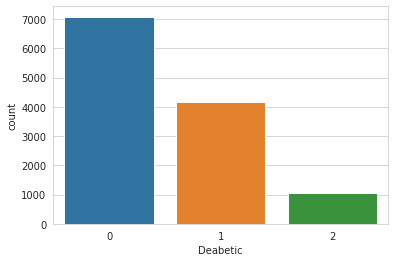

In [21]:
sns.set_style('whitegrid')
sns.countplot(x= 'Deabetic',data= df2)

**There are three categories of diabetics (0,1,2). 0 means no diabetes, 1 means type 1 diabetic, 2 means type 2 diabetic. But we want to predict whether the patient has diabetes or not. We, therefore, group together all type 1 and type 2 diabetic patients in the same category.**

In [22]:
filt = ((df2['Deabetic'] == 1) | (df2['Deabetic'] == 2))
df3 = df2.copy()
df3.loc[filt, 'Deabetic'] = 1

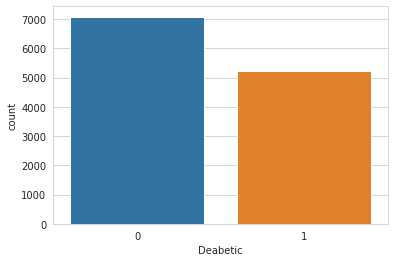

In [23]:
sns.set_style('whitegrid')
sns.countplot(x= 'Deabetic',data= df3)

###***Visualization based on SEX***

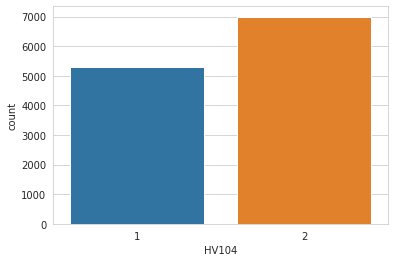

In [24]:
sns.set_style('whitegrid')
sns.countplot(x= 'HV104',data= df3)

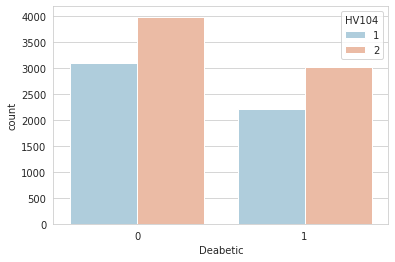

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Deabetic', hue='HV104', data=df3, palette='RdBu_r')

###***Visualization of Eating Anything***

In [26]:
df3['SB311A'].value_counts()

0.0    8304
1.0    3986
9.0       2
Name: SB311A, dtype: int64

In [27]:
filt = df3['SB311A'] == 9.0
df3.loc[filt, 'SB311A'] = np.nan
df4 = df3.dropna()
df4 = df4.reset_index()
df4 = df4.drop(columns = {'index'})
df4.tail()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
12285,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,1,2682
12286,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,1,2389
12287,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,1,2154
12288,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,0,2761
12289,8,1,5,2,80,0,0,1.0,1.0,0.0,142,71,1,1597


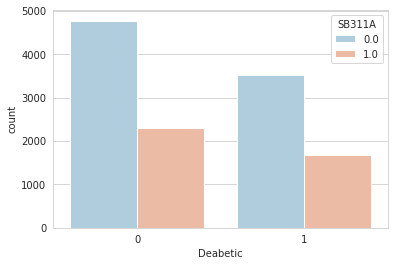

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Deabetic', hue='SB311A', data=df4, palette='RdBu_r')

###***Visualization based on Caffeinated drink***

In [29]:
df4['SB311B'].value_counts()

0.0    11405
1.0      884
9.0        1
Name: SB311B, dtype: int64

In [30]:
filt = df4['SB311B'] == 9.0
df4.loc[filt, 'SB311B'] = np.nan
df5 = df4.dropna()
df5 = df5.reset_index()
df5 = df5.drop(columns = {'index'})
df5.tail()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
12284,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,1,2682
12285,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,1,2389
12286,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,1,2154
12287,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,0,2761
12288,8,1,5,2,80,0,0,1.0,1.0,0.0,142,71,1,1597


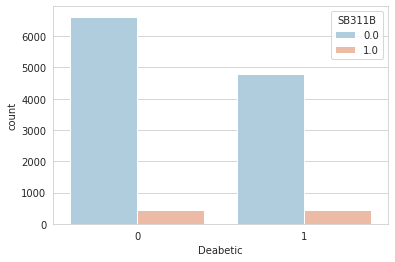

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Deabetic', hue='SB311B', data=df5, palette='RdBu_r')

###***Visualization based on Smoker***

In [32]:
df5['SB311C'].value_counts()

0.0    10419
1.0     1869
9.0        1
Name: SB311C, dtype: int64

In [33]:
filt = df5['SB311C'] == 9.0
df5.loc[filt, 'SB311C'] = np.nan
df6 = df5.dropna()
df6 = df6.reset_index()
df6 = df6.drop(columns = {'index'})
df6.tail()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
12283,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,1,2682
12284,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,1,2389
12285,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,1,2154
12286,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,0,2761
12287,8,1,5,2,80,0,0,1.0,1.0,0.0,142,71,1,1597


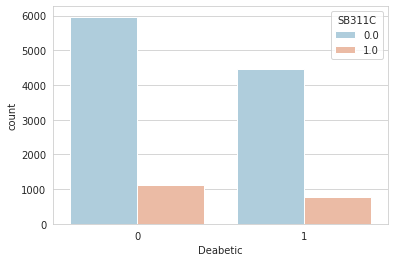

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Deabetic', hue='SB311C', data=df6, palette='RdBu_r')

###***Visualization based on age***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


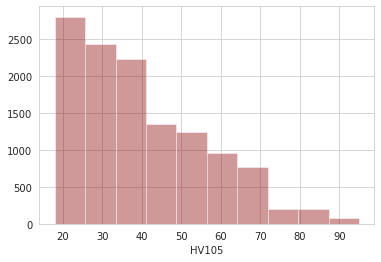

In [37]:
sns.distplot(df6['HV105'],kde=False,color='darkred',bins=10)

#**Feature Extraction**

###***Correlation Heatmap***

In [35]:
df6.corr()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
HV024,1.000000,0.070776,-0.108893,-0.016370,-0.009034,-0.061918,0.013153,-0.029899,-0.035602,0.001517,-0.002284,-0.003957,-0.092038,-0.043673
HV025,0.070776,1.000000,-0.404334,0.019461,0.059471,-0.150111,-0.097858,0.028181,-0.053358,0.049521,-0.015628,-0.038648,-0.081210,-0.054240
HV270,-0.108893,-0.404334,1.000000,-0.006775,-0.028791,0.389567,0.055754,-0.019698,0.077126,-0.103577,0.048389,0.068955,0.170964,0.137624
HV104,-0.016370,0.019461,-0.006775,1.000000,-0.100385,-0.065309,-0.457962,0.051215,-0.065747,-0.006060,-0.069788,-0.008512,0.015220,0.076378
HV105,-0.009034,0.059471,-0.028791,-0.100385,1.000000,-0.437745,-0.051618,0.085603,0.048223,0.206671,0.389906,0.131390,0.082219,0.138698
HV106,-0.061918,-0.150111,0.389567,-0.065309,-0.437745,1.000000,0.122129,-0.049088,0.023049,-0.194187,-0.128329,-0.015372,0.019553,0.029867
SB308,0.013153,-0.097858,0.055754,-0.457962,-0.051618,0.122129,1.000000,-0.043458,0.037803,-0.023202,0.002635,0.033361,0.026157,-0.052686
SB311A,-0.029899,0.028181,-0.019698,0.051215,0.085603,-0.049088,-0.043458,1.000000,0.346713,0.392546,0.018427,-0.015889,-0.003141,0.015378
SB311B,-0.035602,-0.053358,0.077126,-0.065747,0.048223,0.023049,0.037803,0.346713,1.000000,0.190790,0.031583,0.007348,0.035128,0.020644
SB311C,0.001517,0.049521,-0.103577,-0.006060,0.206671,-0.194187,-0.023202,0.392546,0.190790,1.000000,0.045706,-0.000657,-0.015403,-0.023789


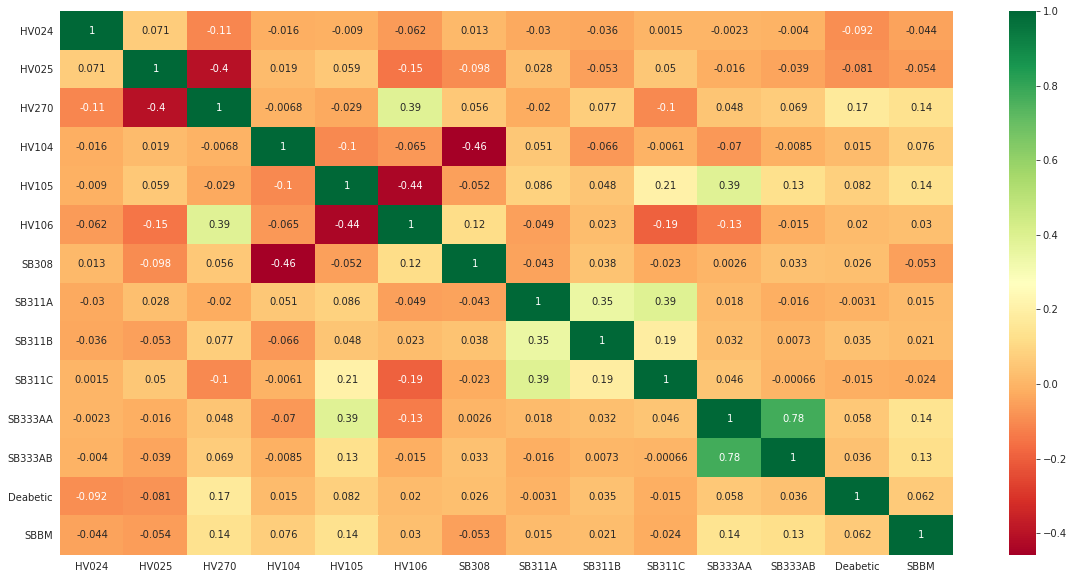

In [36]:
#get correlations of each features in dataset
corrmat = df6.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(df6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###***Univariate Selection***

In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df6.copy()  #independent columns
y = X.pop('Deabetic')    #target column i.e price range

In [39]:
X.head()

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,SBBM
0,1,2,1,1,25,1,31,1.0,1.0,1.0,111,58,2055
1,1,2,1,2,34,0,0,1.0,1.0,1.0,101,67,2481
2,1,2,1,2,35,1,0,1.0,1.0,1.0,100,66,1744
3,1,2,1,1,55,2,52,1.0,0.0,1.0,105,71,2108
4,1,2,1,2,45,1,15,1.0,1.0,0.0,144,94,2455


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Deabetic, dtype: int64

In [41]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [42]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [43]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [44]:
featureScores

,Specs,Score
0,HV024,115.616172
1,HV025,11.327992
2,HV270,240.061724
3,HV104,0.444698
4,HV105,570.656407
5,HV106,3.672804
6,SB308,159.768570
7,SB311A,0.081897
8,SB311B,14.072140
9,SB311C,2.471897


In [45]:
print(featureScores.nlargest(13,'Score'))  #print 10 best features

      Specs         Score
12     SBBM  17086.293755
4     HV105    570.656407
2     HV270    240.061724
10  SB333AA    182.429846
6     SB308    159.768570
0     HV024    115.616172
11  SB333AB     50.203578
8    SB311B     14.072140
1     HV025     11.327992
5     HV106      3.672804
9    SB311C      2.471897
3     HV104      0.444698
7    SB311A      0.081897


###***Feature Importance***

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [47]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09256837 0.01850843 0.06730869 0.02153718 0.1505856  0.06721605
 0.08289396 0.02465023 0.01028373 0.01640934 0.14926662 0.14535207
 0.15341974]


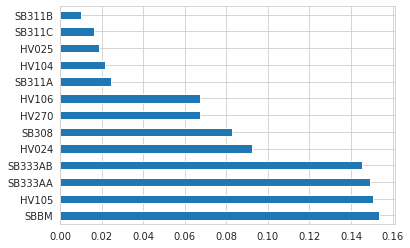

In [48]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

#**Train Test Split**

In [49]:
from sklearn.model_selection import train_test_split
feature_columns = ['SBBM', 'HV105', 'SB333AA', 'SB333AB', 'HV024', 'SB308', 'HV106', 'HV270']
predicted_class = ['Deabetic']

In [50]:

data = pd.DataFrame(columns = feature_columns, data = df6)
data['Deabetic'] = df6['Deabetic']
data

,SBBM,HV105,SB333AA,SB333AB,HV024,SB308,HV106,HV270,Deabetic
0,2055,25,111,58,1,31,1,1,1
1,2481,34,101,67,1,0,0,1,1
2,1744,35,100,66,1,0,1,1,1
3,2108,55,105,71,1,52,2,1,1
4,2455,45,144,94,1,15,1,1,1
...,...,...,...,...,...,...,...,...,...
12283,2682,33,129,96,8,0,2,5,1
12284,2389,20,110,79,8,31,2,5,1
12285,2154,62,114,69,8,31,2,5,1
12286,2761,51,130,79,8,0,1,5,0


In [52]:
X = data[feature_columns].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= random)

#**Feature Scaling**

In [53]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#**Classifiers**

In [51]:
random = 32

###***Logistic Regression***

In [54]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LGclassifier = LogisticRegression(random_state= random)
LGclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=32, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predict_train_data = LGclassifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.614


###***Naive Bayes***

In [56]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
predict_train_data = NBclassifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.615


###***Decision Tree***

In [58]:
# Fitting Decision tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
DSclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DSclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
predict_train_data = DSclassifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.529


###***Random Forest***

In [60]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state= random)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [61]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.621


###***SVM***

In [62]:
# Fitting SVM classifier to the Training set
from sklearn.svm import SVC
SVMclassifier = SVC(kernel='linear', random_state= random)
SVMclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=32, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
predict_train_data = SVMclassifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.585


###***Kernel SVM***

In [64]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
KSVMclassifier = SVC(kernel='rbf', random_state=0)
KSVMclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
predict_train_data = KSVMclassifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.624


###***XG Boost***

In [66]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [67]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [68]:
classifier=xgboost.XGBClassifier()

In [69]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [70]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [71]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.2s finished



 Time taken: 0 hours 0 minutes and 10.66 seconds.


In [72]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [73]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)
score

array([0.4263629 , 0.61513426, 0.45728234, 0.36533767, 0.60455655,
       0.33197722, 0.24572823, 0.50772986, 0.5757329 , 0.59771987])

In [75]:
score.mean()

0.4727561800462758

###***KNN***

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

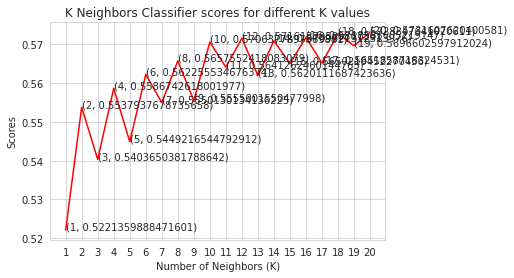

In [78]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    plt.xticks([i for i in range(1, 21)])
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Scores')
    plt.title('K Neighbors Classifier scores for different K values')

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors = 20)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.5731607620400581

#***Aritificial Neural Network (ANN)***

In [80]:
df6

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,Deabetic,SBBM
0,1,2,1,1,25,1,31,1.0,1.0,1.0,111,58,1,2055
1,1,2,1,2,34,0,0,1.0,1.0,1.0,101,67,1,2481
2,1,2,1,2,35,1,0,1.0,1.0,1.0,100,66,1,1744
3,1,2,1,1,55,2,52,1.0,0.0,1.0,105,71,1,2108
4,1,2,1,2,45,1,15,1.0,1.0,0.0,144,94,1,2455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,1,2682
12284,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,1,2389
12285,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,1,2154
12286,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,0,2761


In [81]:
X = df6.copy()  #independent columns
y = X.pop('Deabetic')    #target column i.e price range

In [82]:
X

,HV024,HV025,HV270,HV104,HV105,HV106,SB308,SB311A,SB311B,SB311C,SB333AA,SB333AB,SBBM
0,1,2,1,1,25,1,31,1.0,1.0,1.0,111,58,2055
1,1,2,1,2,34,0,0,1.0,1.0,1.0,101,67,2481
2,1,2,1,2,35,1,0,1.0,1.0,1.0,100,66,1744
3,1,2,1,1,55,2,52,1.0,0.0,1.0,105,71,2108
4,1,2,1,2,45,1,15,1.0,1.0,0.0,144,94,2455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,8,1,5,2,33,2,0,1.0,0.0,1.0,129,96,2682
12284,8,1,5,2,20,2,31,0.0,0.0,0.0,110,79,2389
12285,8,1,5,1,62,2,31,0.0,0.0,0.0,114,69,2154
12286,8,1,5,2,51,1,0,1.0,0.0,1.0,130,79,2761


In [83]:
y

0        1
1        1
2        1
3        1
4        1
        ..
12283    1
12284    1
12285    1
12286    0
12287    1
Name: Deabetic, Length: 12288, dtype: int64

In [84]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
X_train, X_test

(array([[-1.56692554e+00,  7.43587648e-01, -1.44115314e+00, ...,
          9.06021356e-02,  3.06350044e-01, -2.74450524e-01],
        [ 2.20780827e-01,  7.43587648e-01, -1.44115314e+00, ...,
         -6.22784792e-01,  2.66211942e-02, -7.81281412e-01],
        [ 6.67707418e-01, -1.34483138e+00,  6.58214876e-01, ...,
         -1.29158504e+00, -5.32836506e-01, -4.33803467e-01],
        ...,
        [ 1.11463401e+00,  7.43587648e-01, -4.15744633e-02, ...,
          1.42876960e-03,  2.66211942e-02, -2.47891700e-01],
        [ 1.11463401e+00, -1.34483138e+00,  1.35800421e+00, ...,
          3.58122234e-01,  7.25943320e-01,  1.91435512e-01],
        [-1.11999895e+00, -1.34483138e+00,  1.35800421e+00, ...,
         -5.78198109e-01, -3.23039868e-01, -4.72535085e-01]]),
 array([[-0.67307236,  0.74358765,  0.65821488, ...,  0.31353555,
          0.58607889, -0.79566744],
        [ 0.22078083, -1.34483138,  0.65821488, ..., -0.13233128,
         -0.46290429, -0.43159023],
        [-1.11999895,  0.

In [86]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [87]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
# classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [88]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [89]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
983/983 [==============================] - 5s 2ms/step - loss: 0.6798 - accuracy: 0.5864
Epoch 2/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6615 - accuracy: 0.6256
Epoch 3/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6569 - accuracy: 0.6222
Epoch 4/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6602 - accuracy: 0.6159
Epoch 5/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6537 - accuracy: 0.6232
Epoch 6/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6469 - accuracy: 0.6351
Epoch 7/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6483 - accuracy: 0.6305
Epoch 8/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6525 - accuracy: 0.6238
Epoch 9/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6499 - accuracy: 0.6255
Epoch 10/100
983/983 [==============================] - 2s 2ms/step - loss: 0.6502 - accura

In [90]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [92]:
cm

array([[1141,  255],
       [ 672,  390]])

In [93]:
(1170 + 226) / (694 + 368 + 1170 + 226)

0.5679414157851912

In [94]:
(1143 + 410) / (652 + 253 + 1143 + 410)

0.6318144833197722

In [95]:
(cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

0.6228641171684296

#**Evaluating, Improving and Tuning the ANN**

###**Evaluting ANN**

In [102]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [108]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Epoch 1/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6814 - accuracy: 0.5765
Epoch 2/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6616 - accuracy: 0.5935
Epoch 3/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6585 - accuracy: 0.6209
Epoch 4/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6573 - accuracy: 0.6266
Epoch 5/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6600 - accuracy: 0.6229
Epoch 6/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6553 - accuracy: 0.6356
Epoch 7/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6549 - accuracy: 0.6294
Epoch 8/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6482 - accuracy: 0.6434
Epoch 9/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6491 - accuracy: 0.6321
Epoch 10/100
885/885 [==============================] - 3s 3ms/step - loss: 0.6527 - accura

In [109]:
mean = accuracies.mean()
mean

0.6218718230724335

In [111]:
variance = accuracies.std()
variance

0.013419407458371

###**Improving & Tuning the ANN**

In [112]:
# Dropout Regularization to reduce overfitting if needed

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)


In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
best_parameters

In [ ]:
best_accuracy